A

In [ ]:
import time
import cv2
from robomaster import robot
from robomaster import camera

if __name__ == '__main__':
    ep_robot = robot.Robot()
    ep_robot.initialize(conn_type="rndis")

    ep_camera = ep_robot.camera

    ep_camera.start_video_stream(display=False, resolution=camera.STREAM_720P)
    img = ep_camera.read_cv2_image(strategy="newest")

    cv2.imshow("Image", img)
    cv2.imwrite("image720p.png", img)

    # print("Image size:", img.shape)

    cv2.waitKey(0)
    cv2.destroyAllWindows()

    ep_camera.stop_video_stream()
    ep_robot.close()


B

In [34]:
import cv2

image = cv2.imread('image720p.png')

cv2.imshow('Image', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

print(image.shape) 

(360, 640, 3)


C

In [11]:
import cv2

# Load the RGB image
image = cv2.imread('image720p.png')

# Convert the image from BGR (OpenCV default) to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert the RGB image to HLS (Hue, Lightness, Saturation) color space
hls_image = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2HLS)

# Extract the L-channel (Lightness)
l_channel = hls_image[:, :, 1]

# Display the L-channel image
cv2.imshow('L-channel', l_channel)
cv2.waitKey(0)  # Wait for a key press to close the window
cv2.destroyAllWindows()

# Save the L-channel image if needed
cv2.imwrite('L_channel_image.png', l_channel)


True

D

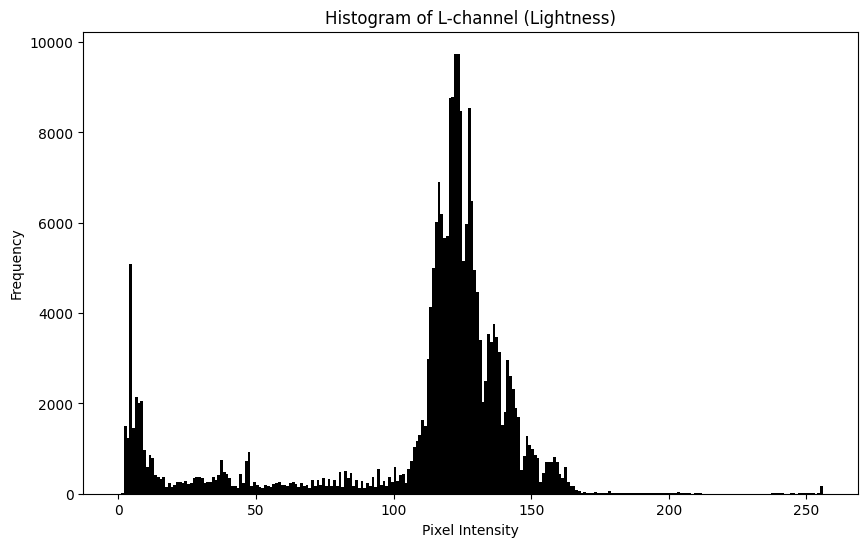

In [14]:
import cv2
import matplotlib.pyplot as plt

# Load the RGB image
image = cv2.imread('image720p.png')

# Convert the image from BGR (OpenCV default) to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert the RGB image to HLS (Hue, Lightness, Saturation) color space
hls_image = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2HLS)

# Extract the L-channel (Lightness)
l_channel = hls_image[:, :, 1]

plt.figure(figsize=(10, 6))
plt.hist(l_channel.ravel(), bins=256, range=[0, 256], color='black')
plt.title('Histogram of L-channel (Lightness)')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

E

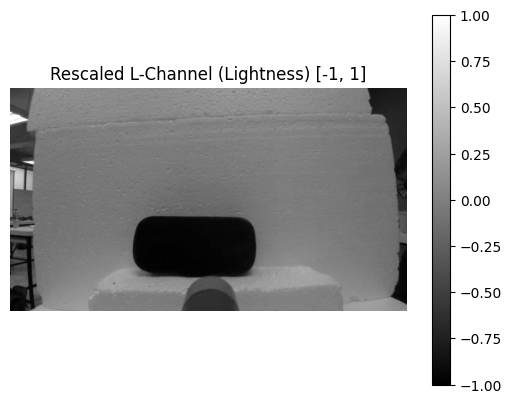

Min value: -1.0
Max value: 1.0


In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('image720p.png')

# Convert the image from BGR (OpenCV default) to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert the RGB image to HLS (Hue, Lightness, Saturation) color space
image_hls = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2HLS)

# Extract the L-channel (Lightness)
l_channel = image_hls[:, :, 1]

# Normalize the L-channel to the range [0, 1]
l_channel_normalized = l_channel / 255.0

# Rescale the normalized L-channel to the range [-1, 1]
l_channel_rescaled = 2 * l_channel_normalized - 1

# Display the rescaled L-channel image
plt.imshow(l_channel_rescaled, cmap='gray')
plt.title('Rescaled L-Channel (Lightness) [-1, 1]')
plt.axis('off')
plt.colorbar()
plt.show()

# Print some information about the rescaled L-channel
print(f"Min value: {l_channel_rescaled.min()}")
print(f"Max value: {l_channel_rescaled.max()}")

F

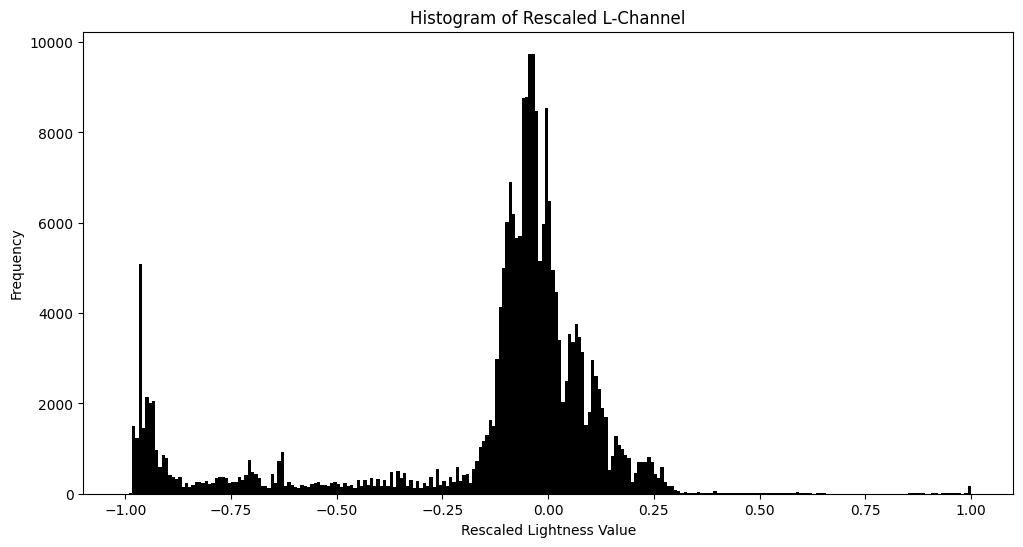

Min value: -1.0
Max value: 1.0


In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('image720p.png')

# Convert the image from BGR (OpenCV default) to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert the RGB image to HLS (Hue, Lightness, Saturation) color space
image_hls = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2HLS)

# Extract the L-channel (Lightness)
l_channel = image_hls[:, :, 1]

# Normalize the L-channel to the range [0, 1]
l_channel_normalized = l_channel / 255.0

# Rescale the normalized L-channel to the range [-1, 1]
l_channel_rescaled = 2 * l_channel_normalized - 1

# Display the rescaled L-channel histogram
plt.figure(figsize=(12, 6))

plt.hist(l_channel_rescaled.ravel(), bins=256, range=(-1, 1), color='black')
plt.title('Histogram of Rescaled L-Channel')
plt.xlabel('Rescaled Lightness Value')
plt.ylabel('Frequency')

plt.show()

# Print some information about the rescaled L-channel
print(f"Min value: {l_channel_rescaled.min()}")
print(f"Max value: {l_channel_rescaled.max()}")

 G

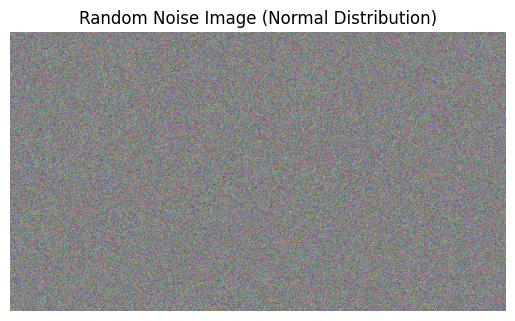

In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the original image
image = cv2.imread('image720p.png')

# Get the size of the original image
height, width, channels = image.shape

# Create random noise with normal distribution (mean=0, std=1) for each channel
noise = np.random.normal(0, 1, (height, width, channels))

# Normalize noise to [0, 255] and convert to uint8
noise_normalized = np.clip((noise - np.min(noise)) / (np.max(noise) - np.min(noise)) * 255, 0, 255).astype(np.uint8)

# Display the random noise image
plt.imshow(cv2.cvtColor(noise_normalized, cv2.COLOR_BGR2RGB))
plt.title('Random Noise Image (Normal Distribution)')
plt.axis('off')
plt.show()


H

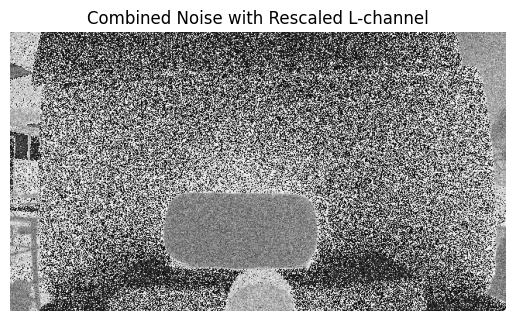

In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the original image
image = cv2.imread('image720p.png')

# Convert the image from BGR to LAB color space
lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2Lab)

# Extract the L-channel
l_channel = lab_image[:, :, 0]

# Get the size of the original image
height, width, channels = image.shape

# Create random noise with normal distribution (mean=0, std=1) for each channel
noise = np.random.normal(0, 1, (height, width))

# Normalize the noise to [0, 255]
noise_normalized = np.clip((noise - np.min(noise)) / (np.max(noise) - np.min(noise)) * 255, 0, 255).astype(np.uint8)

# Rescale L-channel to match the range of noise
l_channel_rescaled = np.clip((l_channel - np.min(l_channel)) / (np.max(l_channel) - np.min(l_channel)) * 255, 0, 255).astype(np.uint8)

# Combine the noise with the rescaled L-channel
combined_image = np.clip(l_channel_rescaled + noise_normalized, 0, 255).astype(np.uint8)

# Display the combined image
plt.imshow(combined_image, cmap='gray')
plt.title('Combined Noise with Rescaled L-channel')
plt.axis('off')
plt.show()


I

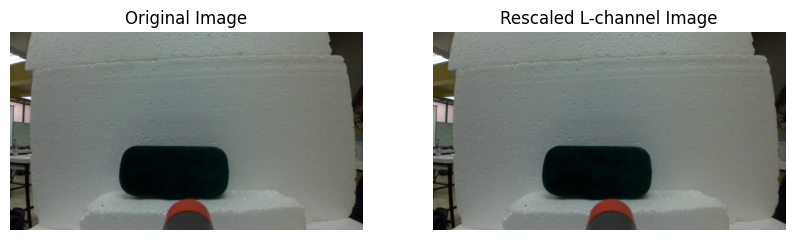

In [40]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# โหลดภาพและแปลงเป็นพื้นที่สี LAB
image = cv2.imread('image720p.png')
lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2Lab)

# แยกช่อง L, A และ B ออกจากภาพ LAB
L, A, B = cv2.split(lab_image)

# ปรับสเกลช่อง L ให้อยู่ในช่วง [0, 255]
L_rescaled = cv2.normalize(L, None, 0, 255, cv2.NORM_MINMAX)

# รวมช่อง L ที่ปรับสเกลแล้วกลับเข้ากับช่อง A และ B เดิม
lab_rescaled = cv2.merge((L_rescaled, A, B))

# แปลงภาพ LAB กลับเป็น BGR (OpenCV ใช้ BGR เป็นค่าเริ่มต้น)
rescaled_rgb = cv2.cvtColor(lab_rescaled, cv2.COLOR_Lab2BGR)

# แสดงภาพต้นฉบับและภาพที่มีการปรับสเกล L-channel โดยใช้ Matplotlib
plt.figure(figsize=(10, 5))

# แสดงภาพต้นฉบับ
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

# แสดงภาพที่มีการปรับสเกล L-channel
plt.subplot(1, 2, 2)
plt.title("Rescaled L-channel Image")
plt.imshow(cv2.cvtColor(rescaled_rgb, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()


J

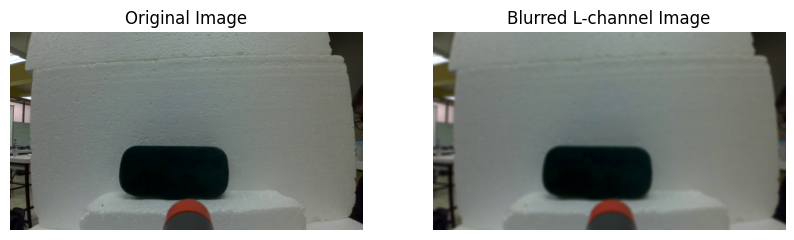

In [41]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image and convert it to LAB color space
image = cv2.imread('image720p.png')
lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

# Split the LAB image into L, A, and B channels
L, A, B = cv2.split(lab_image)

# Apply Box Blur filter to the L-channel image
# Box Blur with kernel size 6x6
kernel_size = 6
L_blurred = cv2.blur(L, (kernel_size, kernel_size))

# Merge the blurred L channel back with the original A and B channels
lab_blurred = cv2.merge((L_blurred, A, B))

# Convert the LAB image back to BGR color space
blurred_rgb = cv2.cvtColor(lab_blurred, cv2.COLOR_LAB2BGR)

# Display the original and result images using Matplotlib
plt.figure(figsize=(10, 5))

# Display the original image
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

# Display the image with blurred L-channel
plt.subplot(1, 2, 2)
plt.title("Blurred L-channel Image")
plt.imshow(cv2.cvtColor(blurred_rgb, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()
